<a href="https://colab.research.google.com/github/DaisyIpatzi/daisyipatzi.github.io/blob/main/assets/ML_Artifacts/Correlation_And_Regression/Correlation_and_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Ex1. Covariance_pearson_correlation

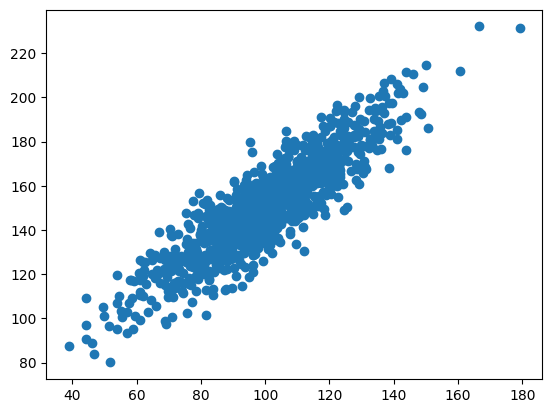

data1: mean=100.776 stdv=19.620
data2: mean=151.050 stdv=22.358
Covariance: 389.755
Pearsons correlation: 0.888


In [2]:
# calculate the Pearson's correlation between two variables
from numpy import mean
from numpy import std
from numpy import cov
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
# seed random number generator
seed(1)

# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)

# calculate covariance matrix
covariance = cov(data1, data2)

# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)

# plot
plt.scatter(data1, data2)
plt.show()

# summarize
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))
print('Covariance: %.3f' % covariance[0][1])
print('Pearsons correlation: %.3f' % corr)

#data1: mean=100.776 stdv=19.620
#data2: mean=151.050 stdv=22.358
#Covariance: 389.755
#Pearsons correlation: 0.888

###Interpretation

*   Average:

-data1 has a mean (average) value of 100.776. This suggests that the average value of the observations in data1 is around 100.776.
-data2 has a mean value of 151.050, indicating its average value is higher than that of data1.

*   Standard Deviation of Data1 and Data2:

The standard deviation of data1 is 19.620, which suggests that the data points in data1 tend to be within approximately 19.620 units of the mean.
The standard deviation of data2 is 22.358, implying a slightly greater spread of data points around the mean compared to data1.

*   Covariance:

The covariance between data1 and data2 is 389.755. Covariance indicates the direction of the linear relationship between two variables. A positive covariance (as in this case) suggests that data1 and data2 tend to increase together. However, covariance does not provide information about the strength of the relationship.

*   Pearson's Correlation Coefficient::

The Pearson's correlation coefficient is 0.888, which is close to 1. This indicates a strong positive linear relationship between data1 and data2. The closer the coefficient is to 1 or -1, the stronger the correlation; a coefficient close to 0 indicates little to no linear correlation.
In summary, data1 and data2 have a strong positive linear relationship, with data2 generally having higher values than data1. The data in both sets are somewhat spread out, as indicated by their standard deviations.

---



# Ex2.